In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def bolts(A2, A3, x, x_o):
    A1 = 303
    a = []
    for i in range(len(A2)):
        b = A2[i] + (A2[i] - A1)/(1+np.exp((x-x_o[i])/A3[i]))
        a.append(b)
    return(np.array(a))

In [4]:
# def bolts_int(A2, A3, x, x_o):
#     A1 = 303
#     b = A2 + (A2-A1)/(1+np.exp((x-x_o)/A3))
#     return b

In [5]:
A2 = np.linspace(1500, 2200, 1000)
A3 = np.linspace(0, 1, 10)
x_o = np.linspace(0, 3, 10)
x = np.linspace(0, 3, 300)

mol = np.linspace(.1, 0.3, 10)

In [6]:
# A2 = 1700

# A3 = 0.1

# x =  np.linspace(-0, 3, 1000)

# x_o = 2#6.5/7*3

In [7]:
def repeat(arr, count):
    return np.ravel(np.stack([arr for _ in range(count)], axis=0))

In [8]:
X_o = repeat(x_o, 1000)

A_2 = repeat(A2, 10)

A_3 = np.repeat(A3, 1000)

Mol = repeat(mol, 1000)

In [9]:
a2 = bolts(A_2, A_3, x, X_o)

/tmp/ipykernel_226905/494744348.py:5: RuntimeWarning: divide by zero encountered in divide
  b = A2[i] + (A2[i] - A1)/(1+np.exp((x-x_o[i])/A3[i]))
/tmp/ipykernel_226905/494744348.py:5: RuntimeWarning: invalid value encountered in divide
  b = A2[i] + (A2[i] - A1)/(1+np.exp((x-x_o[i])/A3[i]))


In [10]:
a2.shape

(10000, 300)

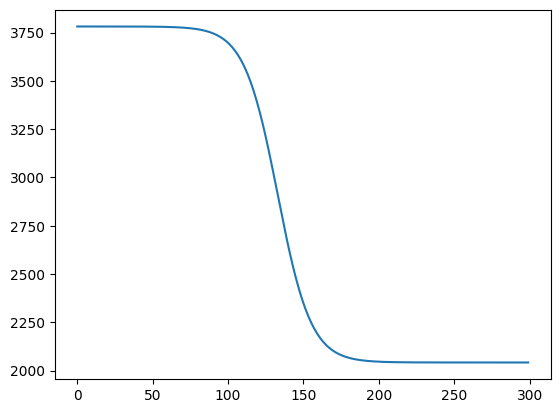

In [11]:
plt.plot(a2[1774])

In [12]:
np.save('profile', a2)

In [13]:
np.save('mol_fra', Mol)

In [14]:
asdf = np.column_stack((A_2, A_3, X_o, Mol))

In [15]:
asdf[8788]

array([2.05215215e+03, 8.88888889e-01, 2.66666667e+00, 2.77777778e-01])

In [16]:
np.save('param', asdf)